# uSEIR data (CCAA) analyses

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 12

In [2]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Wed May 20 17:34:22 2020


In [3]:
import numpy as np
import pandas as pd
import matplotlib

In [4]:
fontsize=14
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }
plt.rcParams["font.size"     ] = fontsize

def figure(size = (10, 8)):
    plt.figure(figsize = size)

In [5]:
import c19.useir            as us
import c19.kfmysir          as kf
import c19.useir_ana        as aus

#import c19.momodata         as 

import scipy          as sp
import scipy.stats    as stats
import scipy.optimize as optimize

npa     = np.array
npdate  = np.datetime64
npdtime = np.timedelta64

## Data

#### Load Data CCAA

In [12]:
dfsa = aus.dfsanidad()

Obtaining meteo data...
Andalucia 5402
Aragon 9434
Asturias 1208H
Baleares B278
Canarias C029O
Cantabria 1111
Castilla La Mancha 4121
Castilla y Leon 2422
Cataluna 0016A
Ceuta 5000C
C. Valenciana 8414A
Extremadura 3469A
Galicia 1428
Madrid 3200
Melilla 6000A
Murcia 7178I
Navarra 9263D
Pais Vasco 1024E
La Rioja 9170
-- Done
-- Done
Index(['Andalucia', 'Aragon', 'Asturias', 'Baleares', 'Canarias', 'Cantabria',
       'Castilla La Mancha', 'Castilla y Leon', 'Cataluna', 'Ceuta',
       'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid', 'Melilla',
       'Murcia', 'Navarra', 'Pais Vasco', 'La Rioja'],
      dtype='object', name='CCAA')
Combining C19 and meteo data...
-- Done
Merging into a single dataframe...
-- Done
Saving the final dataframe to ../data/data_communities.csv ...
-- Done


### Load MoMo

In [16]:
dfmo = aus.dfmomo()

/Users/hernando/investigacion/bio/c19/data/momo_17_05_2020.csv


## Compare Momo and Covid19

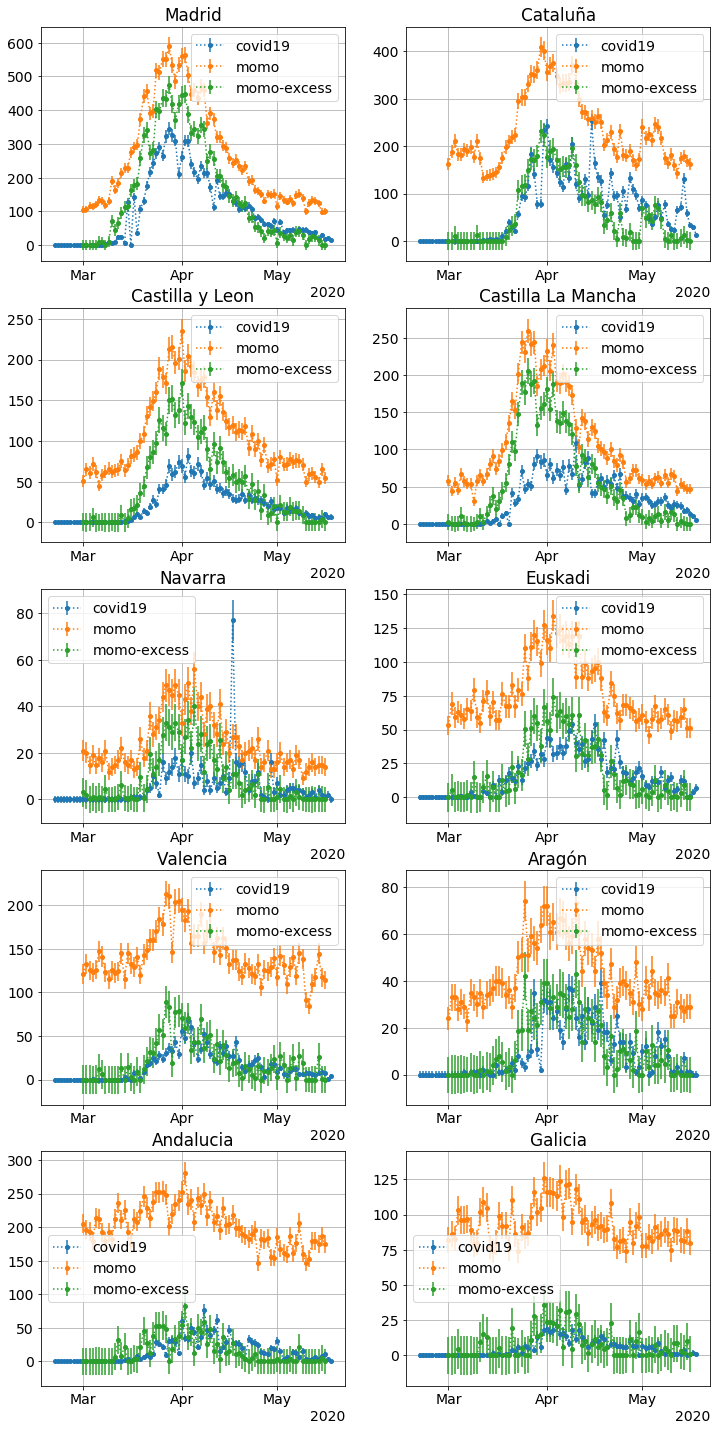

In [17]:
aus.plot_cas_momos(dfsa, dfmo);

### covid-momo: comomo

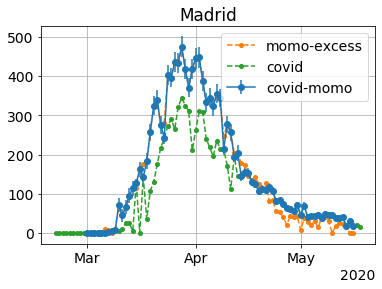

In [18]:
xdates, xdms, xudms = aus.ca_comomo(dfsa, dfmo, 'Madrid', plot = True)

### KF-comomo

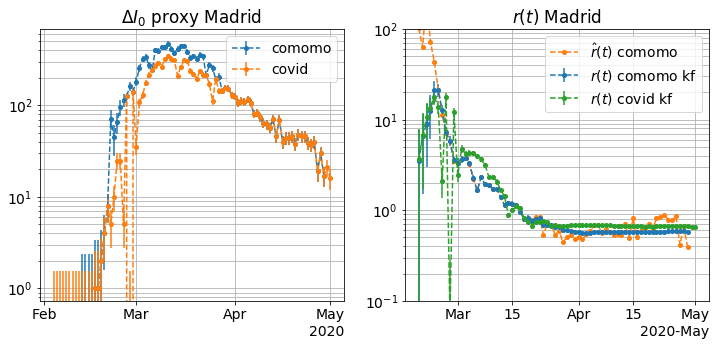

In [19]:
ca             = 'Madrid'
ti, tr, tm, td = 5, 10, 9, 3
frho           = us.fgamma
idates         = ('2020-02-20', '2020-03-20')
times          = (ti, tr, tm, td)
cc = aus.ca_kafi(dfsa, dfmo, ca, times, frho, idates = idates, plot = True)

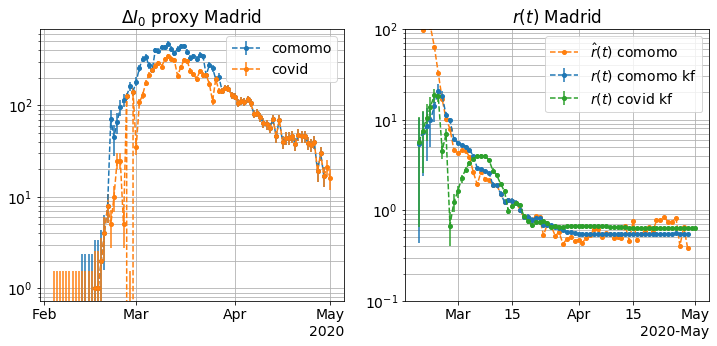

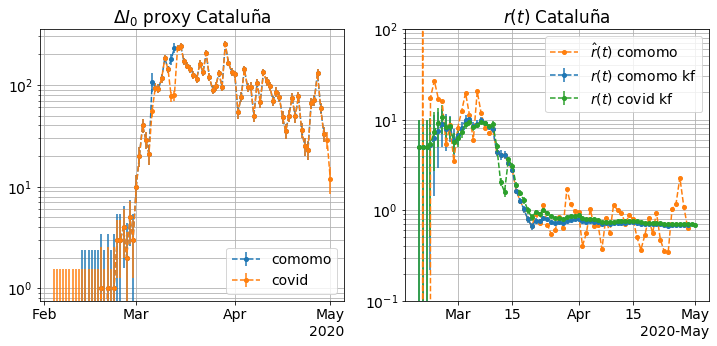

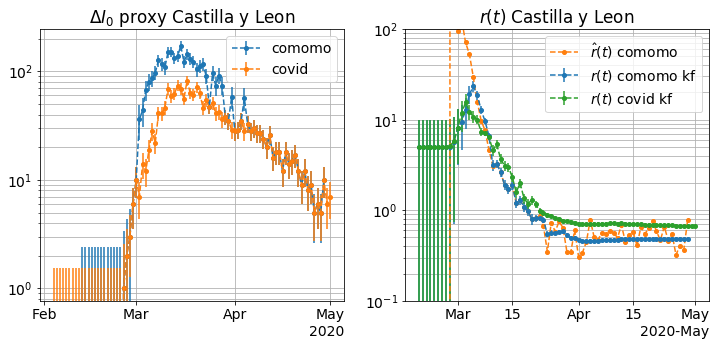

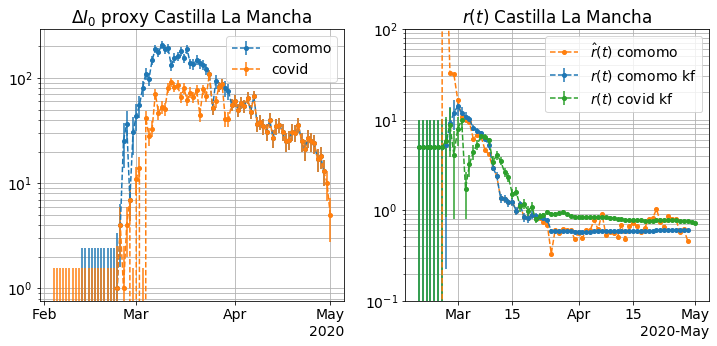

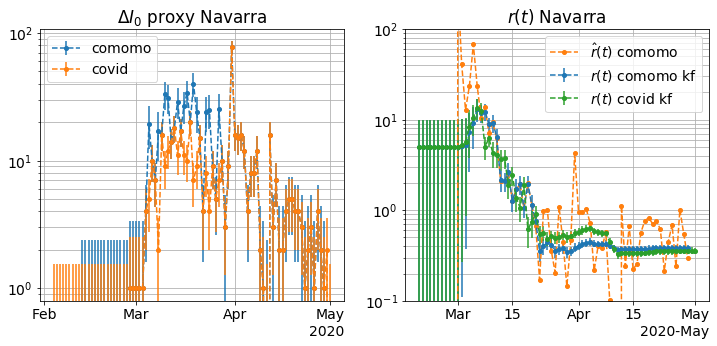

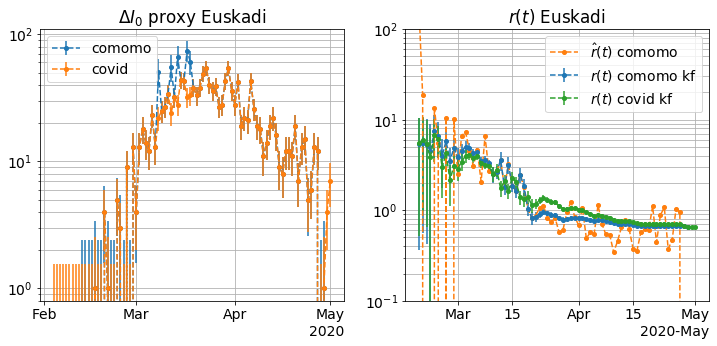

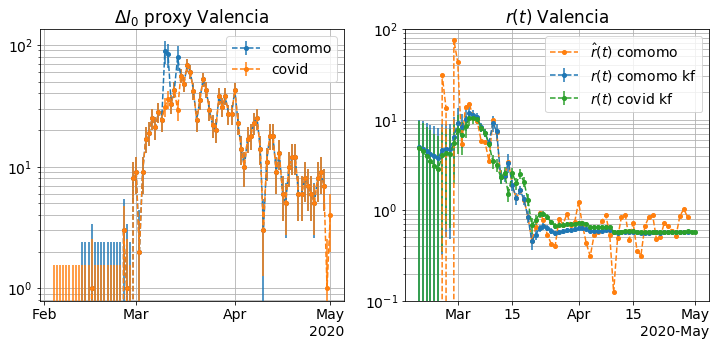

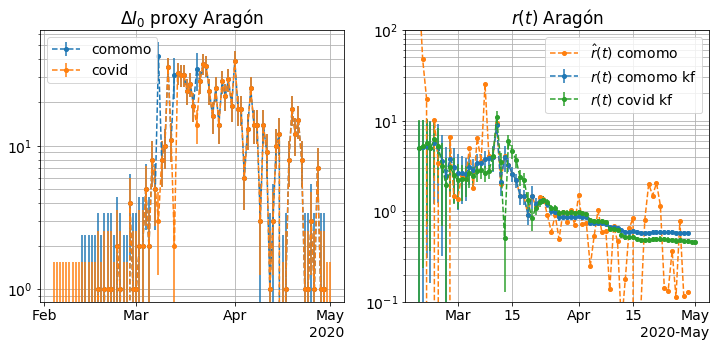

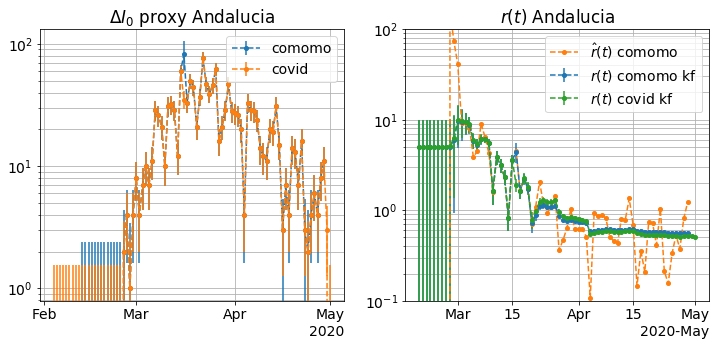

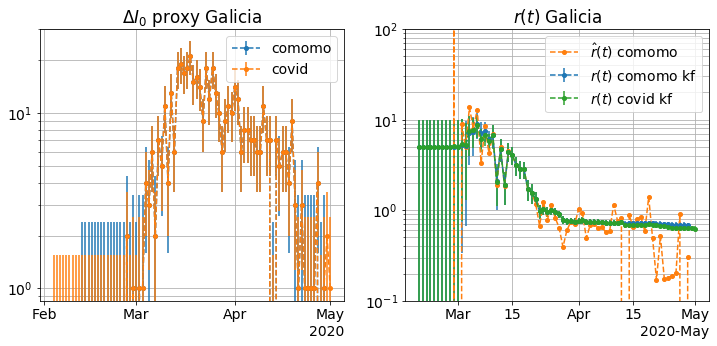

In [20]:
ti, tr, tm, td = 5, 10, 7, 5
frho           = us.fgamma
idates         = ('2020-03-10', '2020-03-20')
times          = (ti, tr, tm, td)
for ca in aus.ccaas.keys():
    cc = aus.ca_kafi(dfsa, dfmo, ca, times, frho, idates = idates, plot = True)

### scan in tds

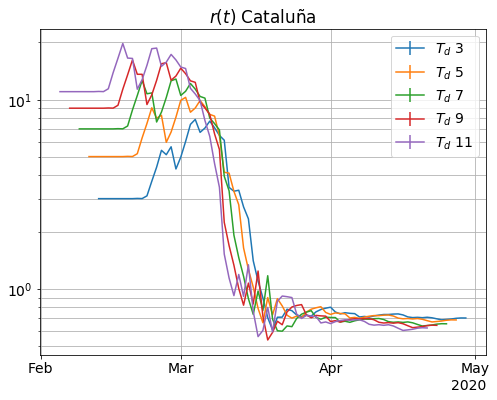

In [21]:
ca             = 'Cataluña'
ti, tr, tm, td = 5, 10, 9, 5
frho           = us.fgamma
idates         = ('2020-03-10', '2020-03-20')
tds            = (3, 5, 7, 9, 11)
rs             = []
for td in tds:
    times          = (ti, tr, tm, td)
    ri, _ = aus.ca_kafi(dfsa, dfmo, ca, times, frho, idates = idates, plot = False)
    rs.append(ri)
    
plt.figure(figsize = (8, 6))
for i, td in enumerate(tds):
    xdates, xrs, xurs = rs[i]
    plt.errorbar(xdates, xrs, yerr = 0.*xurs, label =r'$T_d$ '+str(td))
plt.yscale('log'); plt.grid(which = 'both'); plt.legend();
aus.formatter(plt.gca()); plt.title(r'$r(t)$ '+str(ca)) ;

### scan in tis

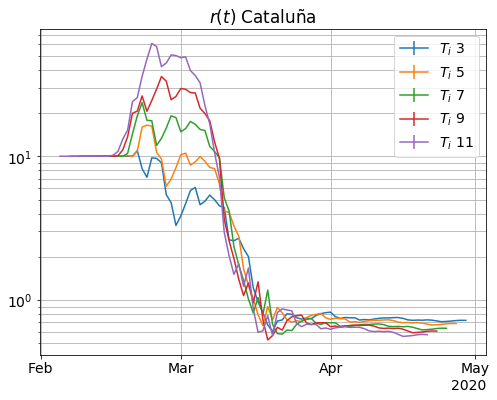

In [23]:
ca             = 'Cataluña'
ti, tr, tm, td = 5, 10, 9, 5
frho           = us.fgamma
idates         = ('2020-03-10', '2020-03-20')
tis            = (3, 5, 7, 9, 11)
rs             = []
for ti in tis:
    times          = (ti, tr, tm, td)
    ri, _ = aus.ca_kafi(dfsa, dfmo, ca, times, frho, idates = idates, plot = False)
    rs.append(ri)
    
plt.figure(figsize = (8, 6))
for i, ti in enumerate(tis):
    xdates, xrs, xurs = rs[i]
    plt.errorbar(xdates, xrs, yerr = 0.*xurs, label =r'$T_i$ '+str(ti))
plt.yscale('log'); plt.grid(which = 'both'); plt.legend();
aus.formatter(plt.gca()); plt.title(r'$r(t)$ '+str(ca)) ;

### scans in pdfs

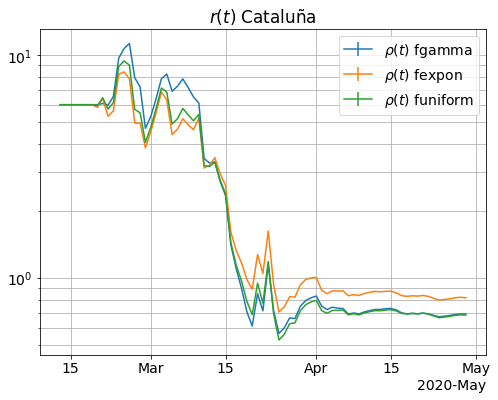

In [24]:
ca             = 'Cataluña'
ti, tr, tm, td = 5, 10, 9, 3
times          = (ti, tr, tm, td)
frhos          = [us.ftheta, us.fpois, us.fgamma, us.fexpon, us.ftriang, us.funiform]
frhos          = [us.fgamma, us.fexpon, us.funiform]

idates         = ('2020-03-10', '2020-03-25')

rs             = []
for frhoi in frhos:
    ri, _ = aus.ca_kafi(dfsa, dfmo, ca, times, frhoi, idates = idates, plot = False)
    rs.append(ri)
    
plt.figure(figsize = (8, 6))
for i, frho in enumerate(frhos):
    xdates, xrs, xurs = rs[i]
    label = str(frho).split()[1]
    plt.errorbar(xdates, xrs, yerr = 0.*xurs, label =r'$\rho(t)$ ' + label)
plt.yscale('log'); plt.grid(which = 'both'); plt.legend();
aus.formatter(plt.gca()); plt.title(r'$r(t)$ '+str(ca)) ;

### selected parameters

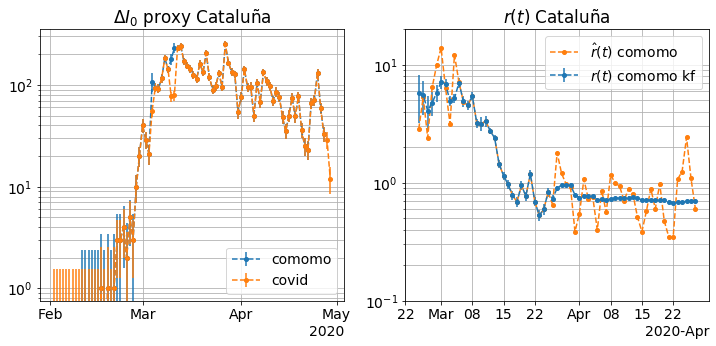

In [33]:
ca             = 'Cataluña'
ti, tr, tm, td = 5, 10, 11, 3
frho           = us.fexpon
times          = (ti, tr, tm, td)
idates         = ('2020-03-05', '2020-03-25')

cc = aus.ca_kafi(dfsa, dfmo, ca, times, frhoi, idates = idates, plot = True)

## CCAA rs

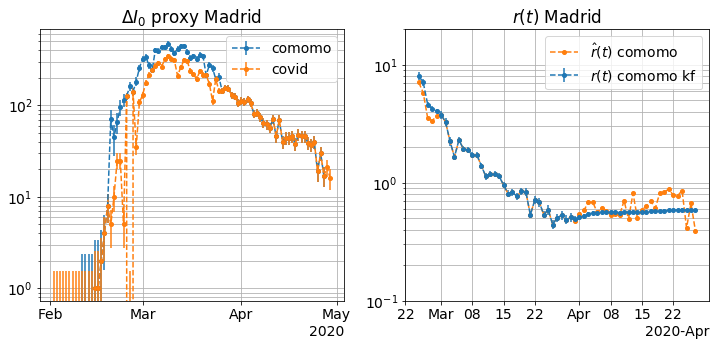

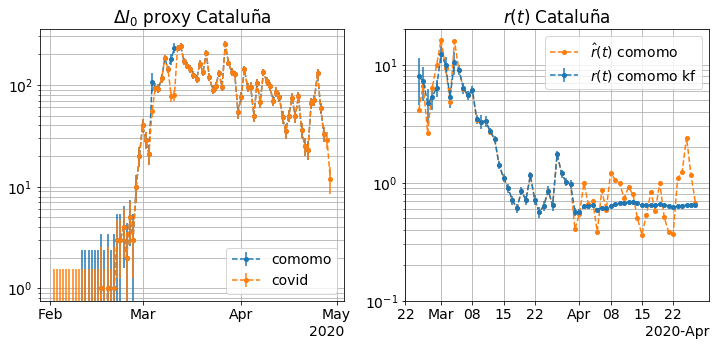

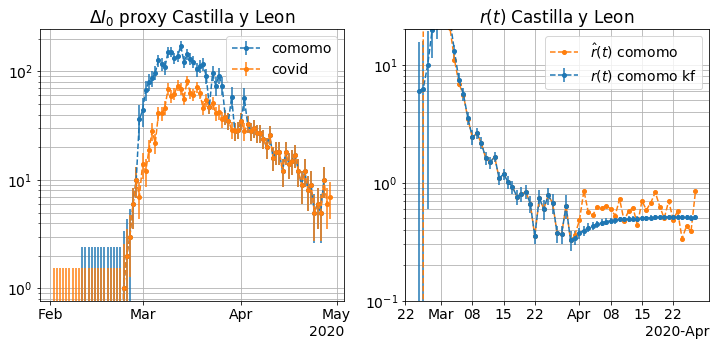

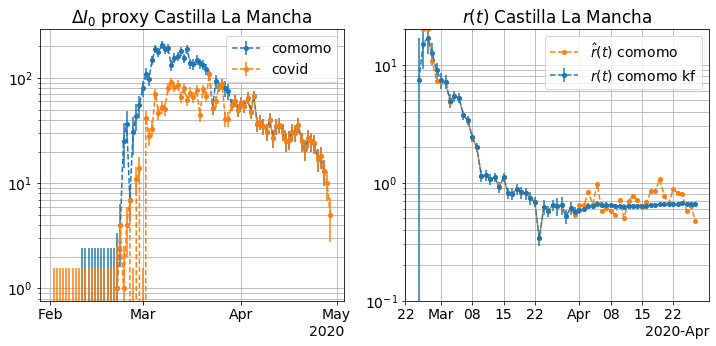

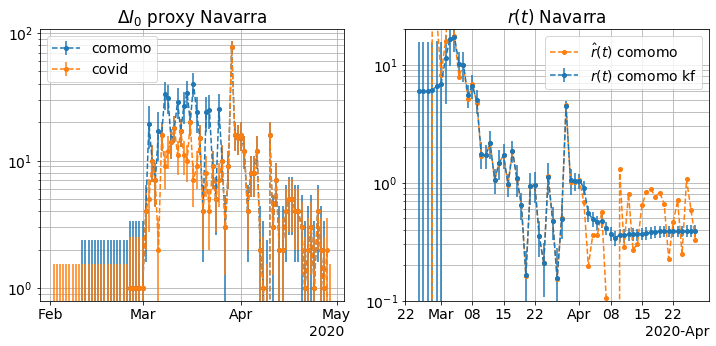

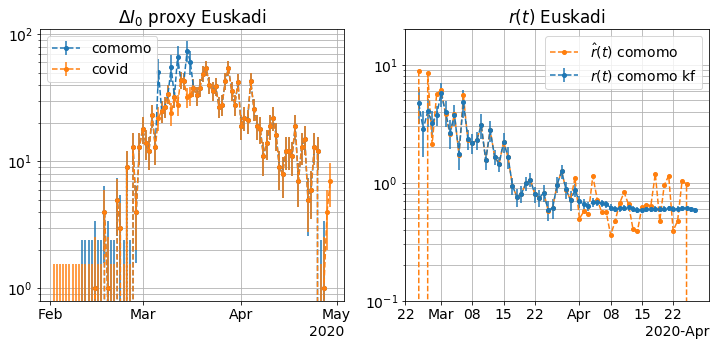

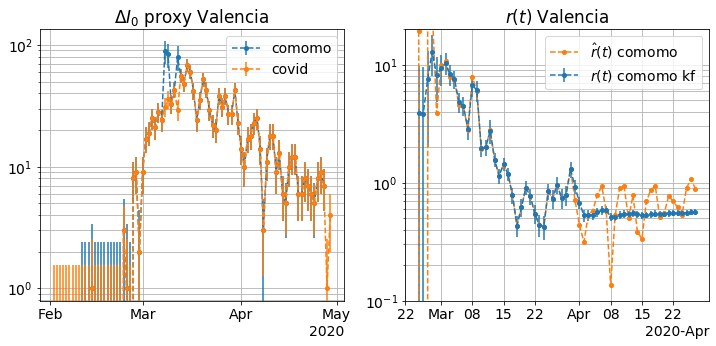

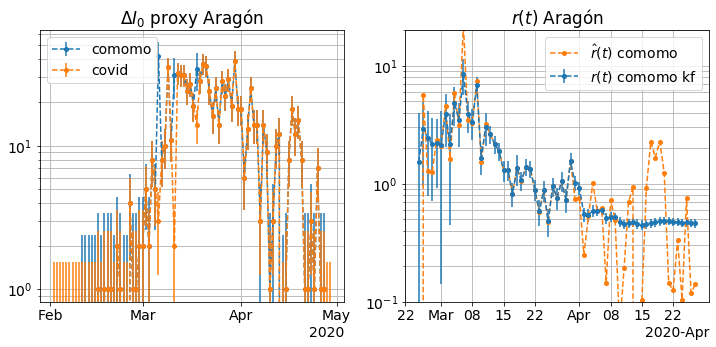

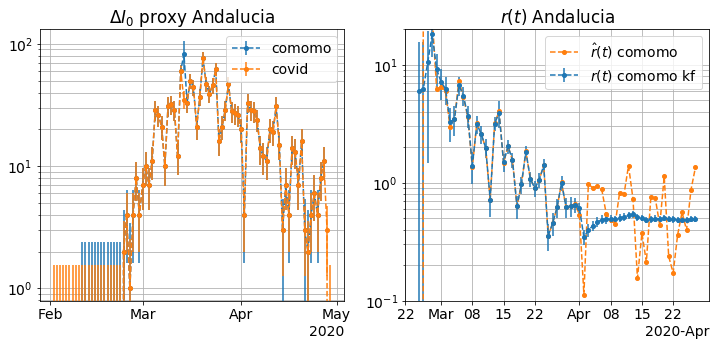

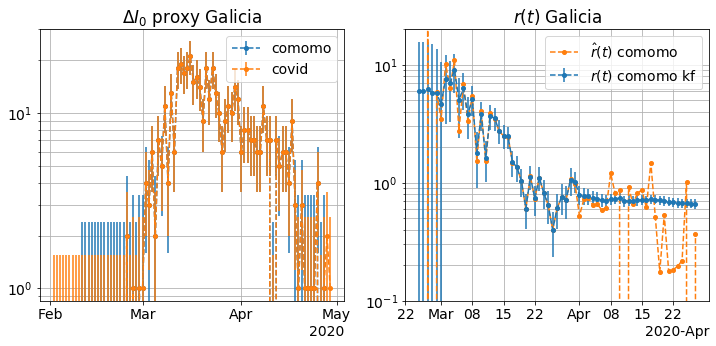

In [39]:
ti, tr, tm, td = 5, 10, 11, 3
frho           = us.fgamma
idates         = ('2020-03-01', '2020-03-30')

for ca in aus.ccaas.keys():
    times = (ti, tr, tm, td)
    ri, _ = aus.ca_kafi(dfsa, dfmo, ca, times, frho, idates = idates, plot = True)